# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID: **Not Applicable**
- Names:  **Glenn Free**
- Student IDs:  **220524174**
- Emails:  **gfree@deakin.edu.au**
- Lab Session and Tutor (for on campus students): **Not Applicable**

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ipywidgets import IntProgress
import pandas as pd
from IPython.display import display
from zipfile import ZipFile


# Your file might be in a different location, so you need to customize the path
all_files = ZipFile('/content/drive/MyDrive/SIT742 - A2/HTWebLog_p1.zip', 'r')
files = all_files.namelist()


data = []
# Define the column names
ColumnNames=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']

#Your code to load data from all log files in the provided zip file
def query_zip(name_of_file):
  zip_data = pd.read_csv(all_files.open(name_of_file), encoding = 'iso-8859-1', comment = '#', sep = " ", names = ColumnNames)
  return zip_data

all_data = [query_zip(name) for name in files]
df_ht = pd.concat(all_data)
df_ht.head()


,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
#Explore dataset for cleaning missing values

for columns in df_ht.columns:
      print('\n\n---------------------------------')
      print(columns, ":")
      print(df_ht[columns].value_counts(), "\n")



---------------------------------
date :
2006-12-12    120190
2006-11-27    120019
2006-12-14    118609
2006-12-13    117075
2006-12-08    113063
               ...  
2007-02-18     30750
2007-01-01     30355
2006-12-31     29400
2007-02-17     26484
2007-03-01         1
Name: date, Length: 121, dtype: int64 



---------------------------------
time :
08:37:00    382
09:55:14    375
09:13:05    358
04:41:05    349
06:30:22    343
           ... 
22:32:15      1
22:42:02      1
22:32:53      1
22:12:25      1
22:35:15      1
Name: time, Length: 86372, dtype: int64 



---------------------------------
s_sitename :
W3SVC1    8438928
Name: s_sitename, dtype: int64 



---------------------------------
s_ip :
127.0.0.1    8438928
Name: s_ip, dtype: int64 



---------------------------------
cs_method :
GET         8421984
POST           9509
HEAD           6723
OPTIONS         595
PROPFIND        106
PUT              11
Name: cs_method, dtype: int64 



--------------------------------

In [ ]:
import numpy as np

print("The length of df_ht before cleaning data is: ", len(df_ht))

df_ht.replace('-', np.nan, inplace=True)

The length of df_ht before cleaning data is:  8438930


In [ ]:
#cleaning data of '-' values
missing_value = (df_ht.isnull().sum()*100/len(df_ht)).reset_index().rename(
    columns = {"index": "column names", 
               0: "% missing"})\
                          .sort_values(
                              by="% missing", 
                              ascending=False)

print(missing_value[missing_value["% missing"] > 15])

    column names   % missing
8    cs_username  100.000000
6   cs_uri_query   93.454194
11   cs(Referer)   15.519242


In [ ]:
#Your code to remove missing values as required
#1.a Drop columns with => 15% NAs.
drop_columns = list(missing_value[missing_value['% missing'] > 15]['column names'])

df_ht.drop(columns = drop_columns , axis =1, inplace = True)
#1.b) Remove rows if row contains any NAs
#df1b = df1a.dropna()
df_ht.dropna(axis=0, inplace=True)

print("The shape of the dataset after removing columns/rows with NA's is: ", df_ht.shape)

The shape of the dataset after removing columns/rows with NA's is:  (8434645, 12)


In [ ]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
print("The number of requests in the weblog_df is: ", len(weblog_df))

The number of requests in the weblog_df is:  2530394


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Your code for feature selection
ml_df = weblog_df[['cs_method','c_ip','cs_uri_stem','cs(User_Agent)','sc_status']]
#Your code to show the top 5 rows of ml_df
ml_df.head()

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
32497,GET,125.28.188.32,/Tulip/common/images/bar_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
58592,GET,210.131.225.123,/Tulip/home/en-us/images/home.swf,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0
115347,GET,221.127.137.14,/Tulip/common/zh-hk/images/sectionbanner_whats...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
62597,GET,221.239.71.229,/Tulip/includes/js/CommonUtil.js,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0
56418,GET,219.79.2.210,/Tulip/common/zh-hk/images/sidebanner_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0


In [ ]:
ml_df.describe(include = ['object', 'float', 'int'])

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
count,2530394,2530394,2530394,2530394,2.530394e+06
unique,6,69852,3577,4667,NaN
top,GET,59.188.33.66,/Tulip/common/common_style.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN
freq,2525435,28104,120907,594830,NaN
mean,NaN,NaN,NaN,NaN,2.300268e+02
std,NaN,NaN,NaN,NaN,5.076679e+01
min,NaN,NaN,NaN,NaN,2.000000e+02
25%,NaN,NaN,NaN,NaN,2.000000e+02
50%,NaN,NaN,NaN,NaN,2.000000e+02
75%,NaN,NaN,NaN,NaN,3.040000e+02


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



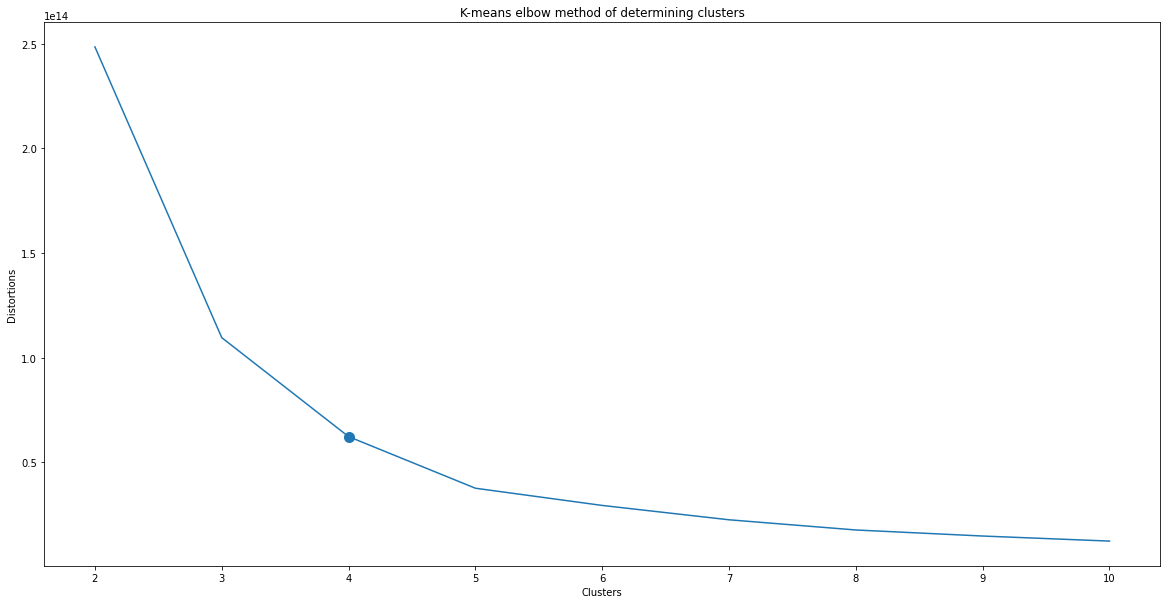

Result: The number of "useful" clusters is deemed to be 4 using the K-means elbow method, shown above. Increasing K further has diminishing returns.


In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

#Your code for Kmeans
distortions = []
kmeans_range = range(2,11)
for k in kmeans_range:
  k_means = KMeans(init = "k-means++", n_clusters = k)
  k_means.fit(le_df)
  distortions.append(k_means.inertia_)
#Your code for visualizing K means result as elbow plot.
plt.figure(figsize=(20,10))
plt.plot(kmeans_range, distortions, marker = 'o', ms=10, markevery=[2])
plt.xlabel('Clusters')
plt.ylabel('Distortions')
plt.title('K-means elbow method of determining clusters')
plt.show()

print("Result: The number of \"useful\" clusters is deemed to be 4 using the K-means elbow method, shown above. Increasing K further has diminishing returns.")

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    53189|2644|       2249|             4|[53189.0,2644.0,2...|
|        0|    47602|2251|       1545|             4|[47602.0,2251.0,1...|
|        0|    47309|2286|       1545|             0|[47309.0,2286.0,1...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [ ]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[53189.0,2644.0,2...|
|        0|[47602.0,2251.0,1...|
|        0|[47309.0,2286.0,1...|
+---------+--------------------+
only showing top 3 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 177036
Test Dataset Count: 75975


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Your code contains trainning from train data and predicting based on the test data

lr = LogisticRegression(featuresCol = "features", labelCol = "sc_status", maxIter=5)
lrModel = lr.fit(trainingData)
predictions = lrModel.transform(testData)
predictions = predictions.select("sc_status", "features", "rawPrediction", "prediction")
predictions=predictions.withColumn("prediction", predictions["prediction"].cast(DoubleType()))
predictions=predictions.withColumn("sc_status", predictions["sc_status"].cast(DoubleType()))

results = predictions.select(['prediction', 'sc_status'])


Text(0.5, 15.0, 'Predicted label')

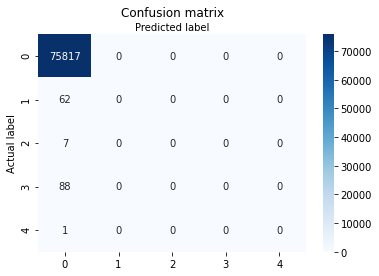

In [ ]:
# Your code to display TP, TN, FP, FN
from pyspark.mllib.evaluation import MulticlassMetrics
import seaborn as sns
predictionAndLabels = results.rdd
metrics = MulticlassMetrics(predictionAndLabels)
cm=metrics.confusionMatrix().toArray()

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), cmap="Blues", annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.plot()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
df_testresults = results.toPandas()

y_true = df_testresults['sc_status']
y_pred = df_testresults['prediction']

def performance_check(y_true, y_pred):
    True_Positive = 0
    False_Positive = 0
    True_Negative = 0
    False_Negative = 0

    for x in range(len(y_pred)): 
        if y_true[x]==y_pred[x]==0:
           True_Positive += 1
        if y_pred[x]==1 and y_true[x]!=y_pred[x]:
           False_Positive += 1
        if y_true[x]==y_pred[x]==1:
           True_Negative += 1
        if y_pred[x]==0 and y_true[x]!=y_pred[x]:
           False_Negative += 1

    return(True_Positive, False_Positive, True_Negative, False_Negative)

print("True positive rate = ", performance_check(y_true,y_pred)[0])
print("False positive rate = ", performance_check(y_true,y_pred)[1])
print("True negative rate = ", performance_check(y_true,y_pred)[2])
print("False negative rate = ", performance_check(y_true,y_pred)[3])


True positive rate =  75817
False positive rate =  0
True negative rate =  0
False negative rate =  158


In [ ]:
from sklearn.metrics import classification_report


# Your Code to display the classification results as required.

print(classification_report(y_true, y_pred, zero_division=0))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     75817
         1.0       0.00      0.00      0.00        62
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00        88
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00     75975
   macro avg       0.20      0.20      0.20     75975
weighted avg       1.00      1.00      1.00     75975



### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression, RandomForestRegressor
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, OneVsRest
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


## I have made an assumption that any model/parameters can be used, and what's being assessed is my ability to use pyspark
## to adjust K and extract valuable hyper-parameter combinations.

### LINEAR REGRESSION ###

lr = LinearRegression(maxIter=5, solver="l-bfgs")

modelEvaluator=MulticlassClassificationEvaluator()
pipeline = Pipeline(stages=[lr])
#Input params
paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.2, 0.01]).addGrid(lr.elasticNetParam, [0, 1]).build()

#2 fold cross validation for linear model
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=modelEvaluator,
                          numFolds=2)

training = trainingData.select("features", "sc_status")
training = training.withColumnRenamed("sc_status", "label")
training

#Fit training data
lrModel = crossval.fit(training)
#Confirm k=2
lrModel.getNumFolds()
#Best model
best_model = lrModel.bestModel
#Best lr hyper-parameter output
best_model

LinearRegressionModel: uid=LinearRegression_e3a37f9cf5c7, numFeatures=4

In [ ]:
### RANDOM FOREST ###

rf = RandomForestRegressor(labelCol="label", featuresCol="features")
rfevaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rfparamGrid = (ParamGridBuilder()
               .addGrid(rf.maxDepth, [2, 5, 10])
               .addGrid(rf.maxBins, [5, 10, 20])
               .addGrid(rf.numTrees, [5, 20, 50])
             .build())

#2 fold cross validation for random forest model
rfcv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = rfevaluator,
                      numFolds = 2)

#Fit training data
rfcvModel = rfcv.fit(training)

rfcv_best_model = rfcvModel.bestModel

#Best rfvc hyper-parameter output
rfcv_best_model

RandomForestRegressionModel: uid=RandomForestRegressor_2dd5af148036, numTrees=20, numFeatures=4

In [ ]:
### DECISION TREE CLASSIFIER ###

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=2)
dtevaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction")
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10, 20, 25])
             .addGrid(dt.maxBins, [10, 20, 30, 50, 90])
             .build())

#2 fold cross validation for decision tree model
dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = dtevaluator,
                      numFolds = 2) # 2 folds

dtcvModel = dtcv.fit(training) #Fit training data

dtcv_best_model = dtcvModel.bestModel


dtcv_best_model #Best dtvc hyper-parameter output

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_08cefb46078c, depth=18, numNodes=259, numClasses=5, numFeatures=4

In [ ]:
print('\033[1m' + '\033[4m' + "The best decision tree hyper-parameters are: "  + '\033[0m', dtcv_best_model)
print('\033[1m' + '\033[4m' + "The best random forest hyper-parameters are: "  + '\033[0m', rfcv_best_model) 
print('\033[1m' + '\033[4m' + "The best linear regression hyper-parameters are: "  + '\033[0m', best_model)

The best decision tree hyper-parameters are:  DecisionTreeClassificationModel: uid=DecisionTreeClassifier_08cefb46078c, depth=18, numNodes=259, numClasses=5, numFeatures=4
The best random forest hyper-parameters are:  RandomForestRegressionModel: uid=RandomForestRegressor_2dd5af148036, numTrees=20, numFeatures=4
The best linear regression hyper-parameters are:  LinearRegressionModel: uid=LinearRegression_e3a37f9cf5c7, numFeatures=4


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=9fe8bfe72daf2105ba0c177e9834148cb92d32319ae44354c3a98c152a8dd160
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [200]:
####### Per discussion board comments, a subset of data can be used for this question   #######

from apyori import apriori

apriori_data = weblog_df[['date', 'cs(User_Agent)', 'cs_uri_stem', 'c_ip']] # subset by dimension
apriori_data = apriori_data[(apriori_data['date'] == '2007-01-07')] # subset by date


apriori_data = apriori_data.drop(['date'], axis=1)

checkobservations = []
for i in range(len(apriori_data)):
  checkobservations.append([str(apriori_data.values[i][j]) for j in range(0, 3)])

relationships = apriori(
    checkobservations,
    min_support = 0.007,
    min_confidence = 0.01,
    min_lift = 15
)

relationships = list(relationships)

for item in relationships:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + "      ~~~~~>      " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+FunWebProducts;+.NET+CLR+1.1.4322)      ~~~~~>      218.103.134.118
Support: 0.007476454024662588
Confidence: 0.8953488372093024
Lift: 47.778226292324376
Rule: 219.75.216.221      ~~~~~>      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322;+.NET+CLR+2.0.50727)
Support: 0.0077677444412078845
Confidence: 1.0
Lift: 37.315217391304344
Rule: Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)      ~~~~~>      59.37.21.162
Support: 0.012525487911447713
Confidence: 1.0
Lift: 15.440779610194904
Rule: 61.10.222.183      ~~~~~>      Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+98;+Win+9x+4.90;+HbTools+4.8.2)
Support: 0.017089037770657345
Confidence: 1.0
Lift: 58.51704545454545
Rule: Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+nifty;+SV1;+.NET+CLR+2.0.50727)      ~~~~~>      61.124.112.210
Support: 0.007961938052238082
Confidence: 1.0
Lift: 86.54621848739497
Rule: 81.96.71.98      ~~~~~>      Mozilla/4.0+(

In [182]:
weblog_df.head()

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,s_port,c_ip,cs(User_Agent),sc_status,sc_substatus,sc_win32_status
32497,2006-11-05,15:20:11,W3SVC1,127.0.0.1,GET,/Tulip/common/images/bar_2.jpg,80.0,125.28.188.32,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0
58592,2006-11-28,11:09:07,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/images/home.swf,80.0,210.131.225.123,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0
115347,2006-12-12,18:39:17,W3SVC1,127.0.0.1,GET,/Tulip/common/zh-hk/images/sectionbanner_whats...,80.0,221.127.137.14,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0,0.0,0.0
62597,2006-11-27,09:13:53,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,80.0,221.239.71.229,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0,0.0,0.0
56418,2006-12-10,16:19:34,W3SVC1,127.0.0.1,GET,/Tulip/common/zh-hk/images/sidebanner_2.jpg,80.0,219.79.2.210,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304.0,0.0,0.0


# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [2]:

!pip install selenium
!pip install bs4
!pip install requests
!pip install unidecode
import requests 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep
import pandas as pd

In [3]:
gang_li_web_link = "https://scholar.google.com/citations?user=dqwjm-0AAAAJ"
    
driver = webdriver.Chrome()
driver.get(gang_li_web_link) # get gang li's webpage

button = driver.find_element_by_css_selector('#gsc_hist_opn') #use css selector to identify button to click
button.click  
sleep(5)

modal_source = driver.page_source # modal pop up source
modal_soup = BeautifulSoup(modal_source,"lxml")

citations = [x.string for x in modal_soup.find_all('a', {'class':"gsc_g_a"})] #search modal by element tag and store in list
year = [y.string for y in modal_soup.find_all('span', {'class':"gsc_g_t"})]

create_df = pd.DataFrame(
      list(zip(
          year,
          citations,
          )),
          columns= ["year", "citations"])


print(create_df)
create_df.to_csv('citation2003-2021.csv', index =False)

    year citations
0   2003        15
1   2004        34
2   2005        17
3   2006        11
4   2007        33
5   2008        41
6   2009        57
7   2010        68
8   2011       105
9   2012       129
10  2013       172
11  2014       251
12  2015       290
13  2016       339
14  2017       386
15  2018       450
16  2019       579
17  2020       838
18  2021       315


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [4]:
!pip install "statsmodels==0.11.1"
!pip install scikit-learn
from statsmodels.tsa.arima.model import ARIMA
from pandas import read_csv
import scipy.stats as st
import numpy as np

In [5]:
data = read_csv('citation2003-2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


dataset = data.values
dataset = dataset.astype('float32')
size= int(len(dataset)) - 4 # length of training set is 15
train, test = dataset[0:size], dataset[size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit() #training/fitting data to ARIMA model.

### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [6]:
# Get year values to tie prediction/obs to year.
dates = data.index.tolist()
date_list = [ ts.date() for ts in dates ]
date_str_list = [ str(date) for date in date_list ]  
year = [int(e[:4]) for e in date_str_list]
year_test = year[size:]


history = [x for x in train]
preds = []
test_years = []
confidence_interval = []


# walk-forward validation
for t in range(len(test[:-1])):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    preds.append(yhat)
    obs = test[t]
    history.append(obs)
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])
    given_year = year_test[t]
    test_years.append(given_year)
    print('Year = %.0f, Predicted result = %.2f, Expected result= %.2f' % (given_year, yhat, obs))
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))


Year = 2018, Predicted result = 429.16, Expected result= 450.00
95% Interval: 390.571 to 467.758
Year = 2019, Predicted result = 502.37, Expected result= 579.00
95% Interval: 464.082 to 540.663
Year = 2020, Predicted result = 677.22, Expected result= 838.00
95% Interval: 625.240 to 729.202


In [7]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
# Your code to show the performance RMSE

rmse = sqrt(mean_squared_error(test[:-1], preds))
print('RMSE: %.2f' % rmse)

RMSE: 103.53


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

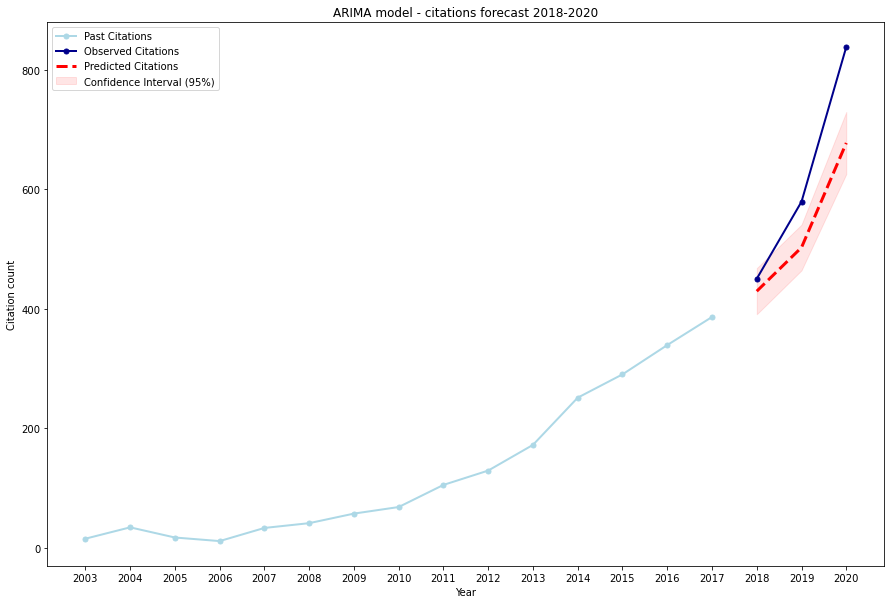

In [8]:
# You code: Visualize as required, the prediction with its confidence interval

test_results_df = pd.DataFrame({"Year":pd.Series(test_years), 
                           "Predicted Citations":pd.Series(preds), 
                           "Observed Citations":pd.Series(test[:-1]),
                            "Lower Bound": pd.Series(np.array(confidence_interval)[:,0]),
                            "Upper Bound": pd.Series(np.array(confidence_interval)[:,1])})




backseries_results = pd.DataFrame({"Year":pd.Series(year[:-1]), 
                           "Past Citations": pd.Series(train)})


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

results_df = pd.merge(test_results_df, backseries_results, how="outer", on = "Year")


plt.fill_between(results_df['Year'],results_df["Upper Bound"], results_df["Lower Bound"],
                alpha=0.1, color='r', label="Confidence Interval (95%)")


plt.plot('Year', 'Past Citations', 
         data=results_df, marker='o', 
         #markerfacecolor='blue', 
         markersize=5, 
         color='lightblue', 
         linewidth=2)

plt.plot('Year', 
         'Observed Citations', 
         data=results_df, marker='o',
         markersize=5,
         color='darkblue', 
         linewidth=2)

plt.plot('Year', 
         'Predicted Citations', 
         data=results_df,
         color='red', 
         linewidth=3, 
         linestyle='dashed')

plt.xticks(results_df["Year"])
plt.title("ARIMA model - citations forecast 2018-2020")
plt.xlabel("Year")
plt.ylabel("Citation count")

plt.legend()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [9]:

# your code to run grid search
p = list(range(1,3))
q = list(range(1,3))
d = list(range(1,3))

data = read_csv('citation2003-2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataset = data.values
dataset = dataset.astype('float32')
size= int(len(dataset)) - 4 # length of training set is 15
train, test = dataset[0:size], dataset[size:]
history = [x for x in train]

p = list(range(1,3))
q = list(range(1,3))
d = list(range(1,3))
predictions = []
RMSE = []
PARAMETER = []

# walk-forward validation
for i1 in p:
    for i2 in q:
        for i3 in d:
            for t in range(len(test[:-1])):
                model = ARIMA(history, order=(i1,i2,i3))
                model_fit = model.fit()
                output = model_fit.get_forecast()
                yhat = output.predicted_mean
                predictions.append(yhat)
                obs = test[t]
                history.append(obs)
            rmse = sqrt(mean_squared_error(test[:-1], predictions))
            history = [x for x in train]
            predictions = list()  
            RMSE.append(rmse)
            PARAMETER.append([i1,i2,i3])
            

            
         


C:\Users\Free family\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Free family\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [10]:
# your code to generate the seach-results.csv and print the top 6 rows

Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
Results.to_csv('search-results.csv', index =False)
Results.head(6)


,RMSE,Parameter
0,103.530717,"[1, 1, 1]"
1,102.457406,"[1, 1, 2]"
2,83.716336,"[1, 2, 1]"
3,94.030090,"[1, 2, 2]"
4,90.112933,"[2, 1, 1]"
5,97.739226,"[2, 1, 2]"


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [14]:
# your code to perform the Arima train on data 2003 to 2020
data_q72 = read_csv('citation2003-2021.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataset_q72 = data_q72.values
dataset_q72 = dataset_q72.astype('float32')

size = int(len(dataset_q72)) -1 # length of training set is 18; 2003 - 2020
train = dataset_q72[0:size]
history = [x for x in train]
predict_21_22 = []
year_q72 = [2021, 2022]
ci_q72 = []
#Find best parameter
best_param = (Results['Parameter'][Results['RMSE'] == Results['RMSE'].min()])
flatten = [] 
for item in best_param:
    flatten += item

best_param


2    [1, 2, 1]
Name: Parameter, dtype: object

In [15]:
## Use best parameter in model fitting, to predict 2021 & 2022.

for t in range(2):
    model = ARIMA(history, order=(flatten[0],flatten[1],flatten[2]))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    obs = yhat[0]
    history.append(obs)
    predict_21_22.append(yhat)
    given_year=year_q72[t]
    ci = output.conf_int(0.05)
    ci_q72.append(ci[0])
    print('Year = %.0f, Predicted result = %.2f' % (given_year, yhat))
    print('95%% Interval: %.2f to %.2f' % (ci[0,0], ci[0,1]))

Year = 2021, Predicted result = 1175.25
95% Interval: 1100.85 to 1249.65
Year = 2022, Predicted result = 1569.57
95% Interval: 1497.41 to 1641.73


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

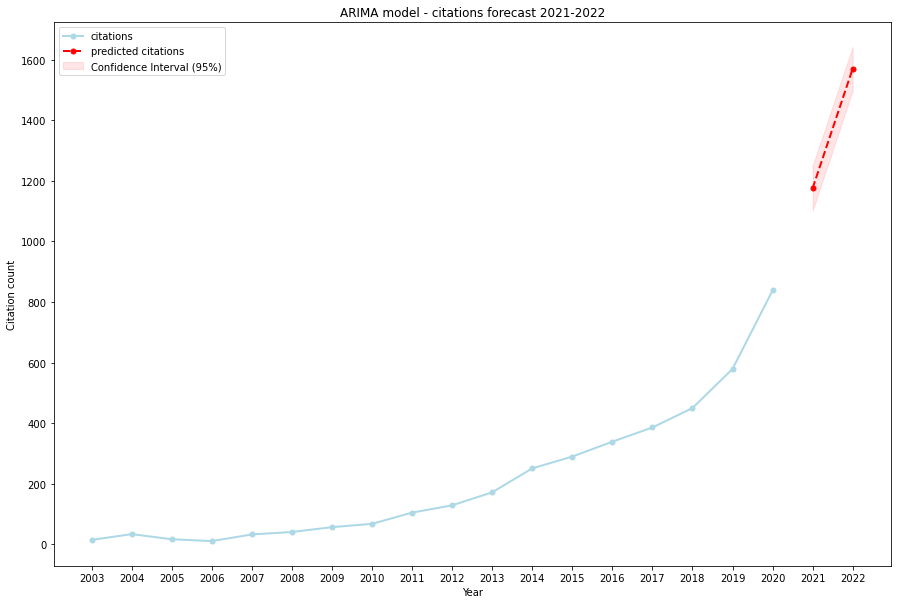

In [12]:
# Plot the points and the prediction with its confidence interval

years_all_df = pd.DataFrame({"year":pd.Series(list(range(2003, 2023)))}) # year span 2003 - 2022
historic_df = pd.read_csv('citation2003-2021.csv', nrows=18) # citation + year data from 2003 - 2020
merge_df = pd.merge(years_all_df, historic_df, how="outer", on = "year") # Outer join two above df's by year

prediction_df = pd.DataFrame({"year":pd.Series(year_q72),  # create preds values, year, c.i. df.
                           "predicted citations":pd.Series(predict_21_22), 
                            "Lower Bound": pd.Series(np.array(ci_q72)[:,0]),
                            "Upper Bound": pd.Series(np.array(ci_q72)[:,1])})


final_df = pd.merge(merge_df, prediction_df, how="outer", on = "year") # Join predictions to df

#Visualise in a similar method to above

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.fill_between(final_df['year'],final_df["Upper Bound"], final_df["Lower Bound"],
                alpha=0.1, color='r', label="Confidence Interval (95%)")


plt.plot('year', 'citations', 
         data=final_df, marker='o', 
         #markerfacecolor='blue', 
         markersize=5, 
         color='lightblue', 
         linewidth=2)

plt.plot('year', 
         'predicted citations', 
         data=final_df, marker='o',
         markersize=5,
         color='red', 
         linewidth=2,
         linestyle='dashed')

plt.xticks(final_df["year"])
plt.title("ARIMA model - citations forecast 2021-2022")
plt.xlabel("Year")
plt.ylabel("Citation count")

plt.legend()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.
